Cria c ̃ao de um Circuito Quˆantico com Emaranhamento

In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile

(a) Crie um circuito quˆantico no Qiskit com dois qubits. Aplique uma porta
Hadamard no primeiro qubit e, em seguida, aplique uma porta CNOT
com o primeiro qubit como controle e o segundo como alvo.

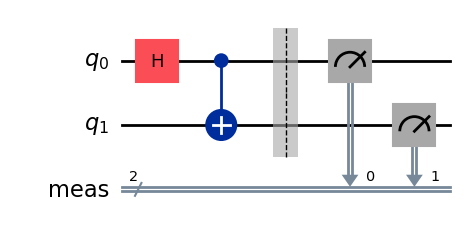

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw("mpl")

(b) Execute o circuito em um simulador (AerSimulator) e mostre os resultados
das medi ̧c ̃oes. O que vocˆe observa em rela ̧c ̃ao ao estado de emaranhamento
dos qubits?

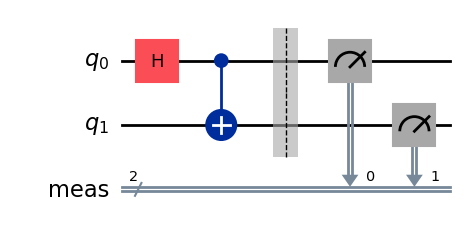

In [3]:
backend_aer = AerSimulator()
qc_transpile = transpile(qc,backend = backend_aer) 
qc_transpile.draw("mpl")

In [4]:
from qiskit_ibm_runtime import SamplerV2


In [5]:
sampler_aer = SamplerV2(backend_aer)

In [6]:
job_aer = sampler_aer.run([(qc_transpile, None, 1000)])

In [7]:
result = job_aer.result()

In [8]:
counts = result[0].data.meas.get_counts()

In [9]:
counts

{'00': 489, '11': 511}

In [10]:
from qiskit.visualization import plot_distribution

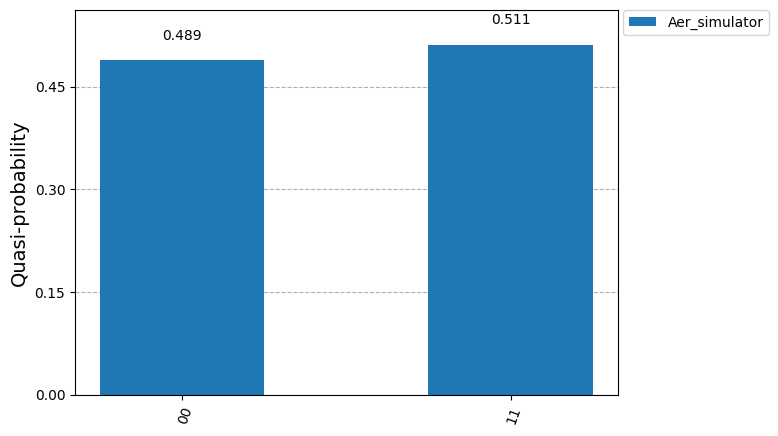

In [11]:
plot_distribution([counts], legend = ['Aer_simulator'])

Execu ̧c ̃ao em um Computador Quˆantico Real

(a) Use o Qiskit para transpilar o circuito criado no exerc ́ıcio anterior, otimizado
para execu ̧c ̃ao em um computador real. Liste os computadores quˆanticos
dispon ́ıveis e execute o circuito no dispositivo menos ocupado.

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [14]:
#Nao funcionou!!

#service = QiskitRuntimeService(channel = 'ibm_quantum', instance = 'ibm-q/open/main',
 #                              token = 'fc5556d51196b4ee8d66a94d02201272c73881a9ad110c3acae6150a82e38705fce9fc6926ab6939722a312ef8956a4d82fce4358305a2bba7a1e3282fbc1a2a')

In [18]:
QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', 
                                  token='fc5556d51196b4ee8d66a94d02201272c73881a9ad110c3acae6150a82e38705fce9fc6926ab6939722a312ef8956a4d82fce4358305a2bba7a1e3282fbc1a2a')

In [19]:
QiskitRuntimeService().backends(simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [21]:
QiskitRuntimeService().least_busy(operational = True)

<IBMBackend('ibm_brisbane')>

In [25]:
backend_real = QiskitRuntimeService().backend('ibm_brisbane')

In [26]:
qc_transpile_real = transpile(qc, backend = backend_real )

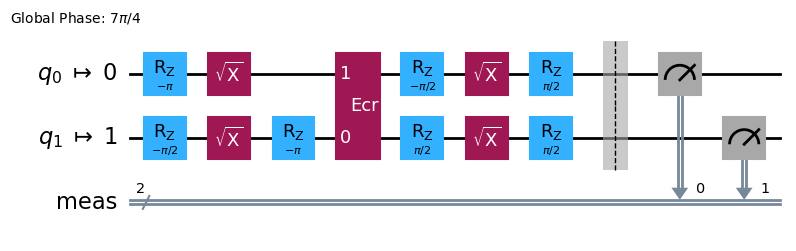

In [29]:
qc_transpile_real.draw("mpl", idle_wires = False)

In [31]:
sampler_real = SamplerV2(backend_real)

In [35]:
job_real = sampler_real.run([(qc_transpile_real, None, 1000)])

In [41]:
#job_anterior = QiskitRuntimeService().job('fc5556d51196b4ee8d66a94d02201272c73881a9ad110c3acae6150a82e38705fce9fc6926ab6939722a312ef8956a4d82fce4358305a2bba7a1e3282fbc1a2a')

In [42]:
result_real = job_real.result()

In [43]:
counts_real = result_real[0].data.meas.get_counts() 

In [44]:
counts_real

{'01': 46, '00': 453, '11': 478, '10': 23}

In [45]:
result_real

PrimitiveResult([PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1000, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-10-03 01:27:46', stop='2024-10-03 01:30:43', size=1000>)])}, 'version': 2})

(b) Compare os resultados da execu ̧c ̃ao no simulador e no computador real.
Quais diferen ̧cas vocˆe observa e por que isso ocorre?

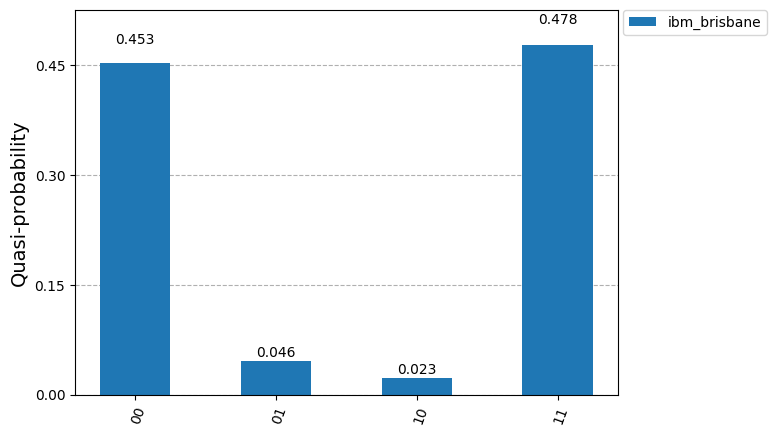

In [46]:
plot_distribution([counts_real], legend = ['ibm_brisbane'])

1) De acordo com o circutito que estamos considerando, inicialmente temos o estado total |psi> = |01>.

2) O qubit zero (q_0) passa por uma porta de Hadamard (H) e assim o seu estado sofre a transição: H|0>_0 --> (|0>_0 + |1>_0)/(2)^(1/2), onde o subscrito representa o qubit zero. Logo após passar pela porta Hadamar e antes de passar pela CNOT o estado total é: |psi> = (|00> + |10>)/(2)^(1/2)

3) Ao passar pela porta CNOT(CX) temos: CX|psi> = (|00> + |11>)/(2)^(1/2). Pois sempre que o controle (segundo o circutio acima, o qubit da esquerda no meu ket) for zero, nada acontece com o alvo (segundo 0 circutio acima, o qubit da direta do meu ket) e sempre que o controle for 1 há a mudança do alvo de 0 para 1 e vice-versa.

4) Sendo assim o meu estado final será |psi> = (|00> + |11>)/(1/2)^2.

5) Esse resultado foi confirmado no simulador Aer. No entado no computador quântico ibm_brisbane os estados |10> e |01> apareceram. Isso ocorreu devido a erros. Cerca de 6.3% no total.